In [66]:
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt 
from PIL import Image
import os, os.path


## Reading images

In [22]:
def read_img_dir(d):
    imgs=[]
    valid_images = [".jpg",".gif",".png",".tga"]
    for f in os.listdir(d):
        ext = os.path.splitext(f)[1]
        if ext.lower() not in valid_images:
            continue
        imgs.append(Image.open(os.path.join(d,f)))
    return imgs

def plot_images(imgs, columns=4):
    n=len(imgs)
    h = (n-1)//columns+1
    f,ax=plt.subplots(h,columns,figsize=(13,10*h/columns))
    plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    for i in range(1,n+1):
        ax[(i-1)//columns,i%columns-1].imshow(imgs[i-1],cmap='gray')


In [83]:
imgs= read_img_dir("img")
#imgs= [np.array(i)[:,:,0] for i in imgs]
imgs= [np.mean(i,axis=2) for i in imgs]

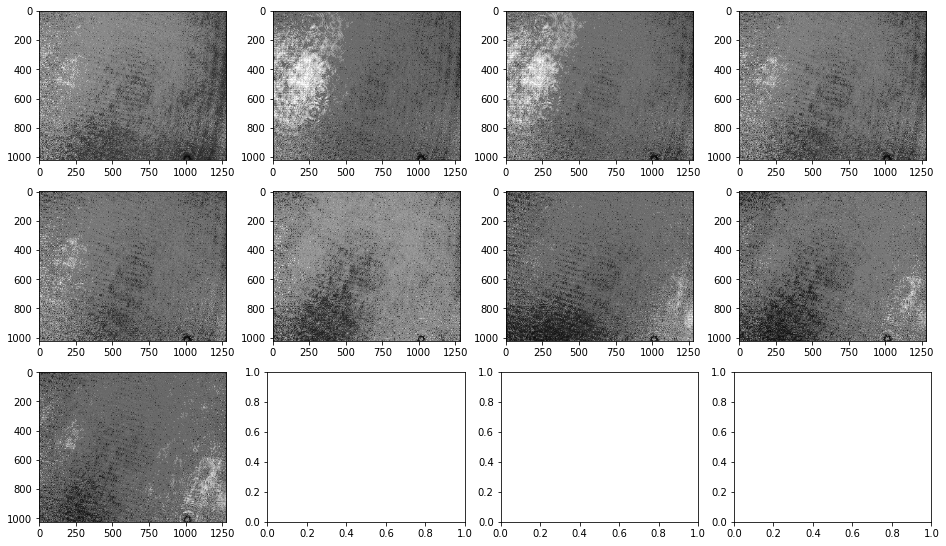

In [84]:
plot_images(imgs)

In [209]:
ff=[ fftpack.fft2(i) for i in imgs]
ff=[ fftpack.fftshift(i) for i in ff]
im_ff=[np.imag(i) for i in ff]
ff_all=ff

ff=[ np.abs(i) **1 for i in ff]
ff=[ np.log10(i) for i in ff]
im_ff=[np.log10(i-np.min(i)+0.1) for i in im_ff]
s = 255/(np.max(im_ff)-np.min(im_ff))
print(s)
im_ff-=np.min(im_ff)

print(im_ff[0])


30.19368109697021
[[7.82175014 7.81921951 7.81569058 ... 7.82695344 7.82772632 7.82426611]
 [7.81571484 7.82434165 7.8237112  ... 7.8211754  7.82175744 7.82042452]
 [7.81882493 7.82077648 7.82322574 ... 7.82200411 7.82220173 7.82138789]
 ...
 [7.82348496 7.82118955 7.82151167 ... 7.82096895 7.82157565 7.82189827]
 [7.82465578 7.82211209 7.82129808 ... 7.82125813 7.82026952 7.82272163]
 [7.82770272 7.82307172 7.82174284 ... 7.82041593 7.81978019 7.81914307]]


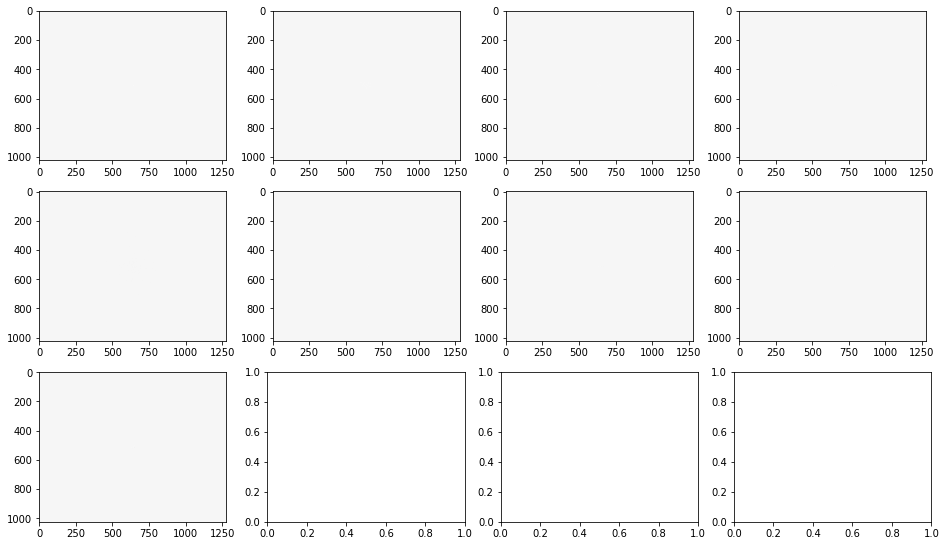

In [210]:
plot_images(im_ff)

## Show fourier

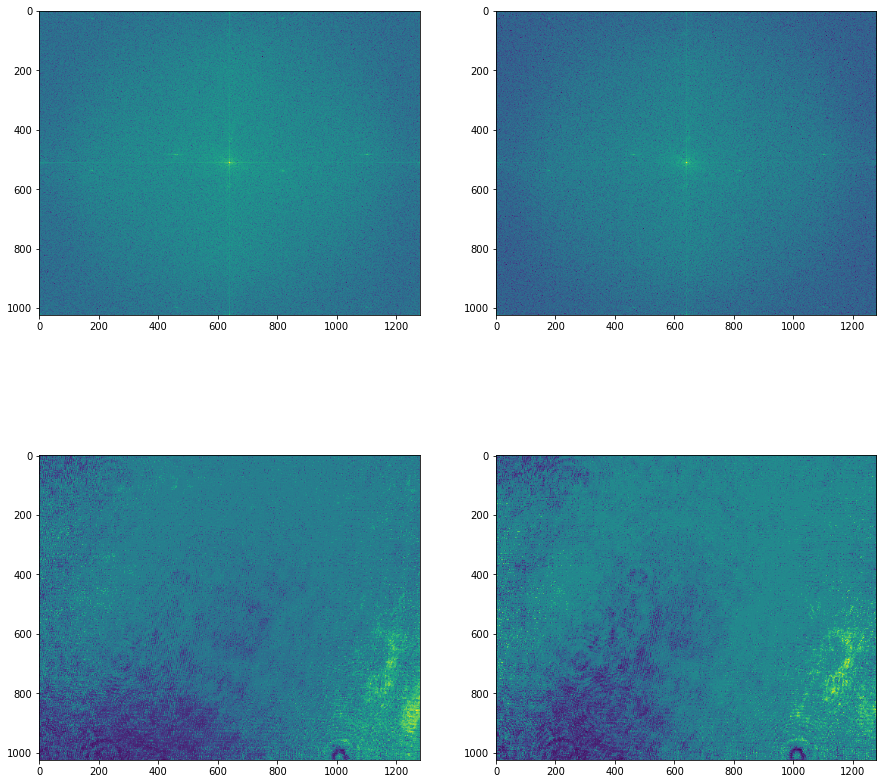

In [211]:
f, axs = plt.subplots(2,2,figsize=(15,15))
axs[0,0].imshow(ff[6])
axs[1,0].imshow(imgs[6])
axs[0,1].imshow(ff[7])
axs[1,1].imshow(imgs[7])

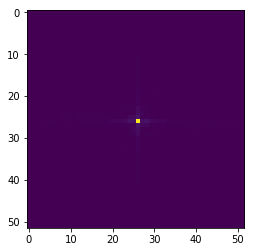

In [234]:
mask = np.zeros(imgs[0].shape)
w,h=imgs[0].shape
s = 26
mask[w//2-s:w//2+s,h//2-s:h//2+s] = 1
filtered=[mask*i for i in ff_all]
plt.imshow(np.abs(filtered[0][w//2-s:w//2+s,h//2-s:h//2+s]))

In [232]:

#rec=[ np.power(10,i) for i in filtered]
rec=[ fftpack.ifftshift(i) for i in filtered]

rec=[ fftpack.ifft2(i) for i in rec]

rec=[ np.abs(i) for i in rec]
rec[0]

array([[85.00370701, 86.13813929, 87.31206475, ..., 81.90083774,
        82.87931847, 83.91541383],
       [85.32100623, 86.49293578, 87.70507194, ..., 82.11180426,
        83.12453519, 84.19612701],
       [85.58129481, 86.78786235, 88.03563936, ..., 82.27589186,
        83.31925651, 84.42296075],
       ...,
       [83.66706974, 84.67369838, 85.71993422, ..., 80.94136072,
        81.79581072, 82.70597851],
       [84.1799335 , 85.23147103, 86.32215697, ..., 81.31928772,
        82.21850958, 83.17373469],
       [84.62460784, 85.71883779, 86.85219194, ..., 81.63804718,
        82.57866498, 83.57593065]])

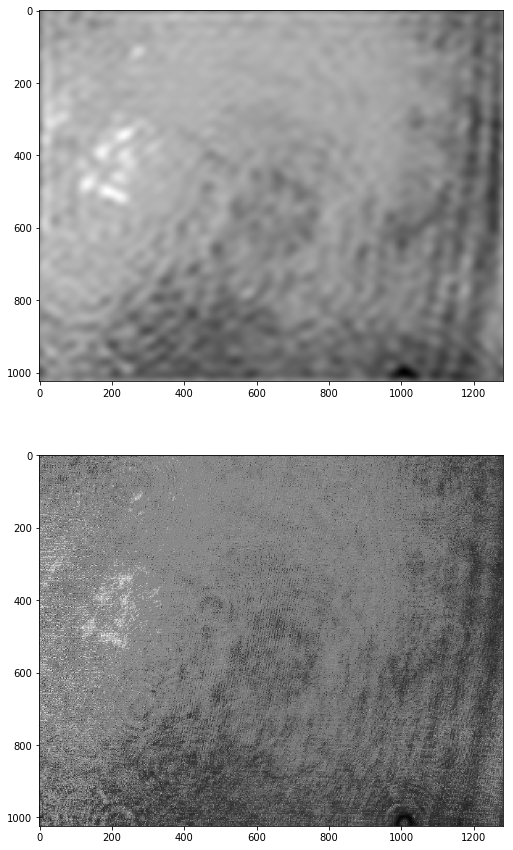

In [233]:
f, axs = plt.subplots(2,1,figsize=(16,15))
axs[0].imshow(rec[0],cmap='gray')
axs[1].imshow(imgs[0],cmap='gray')

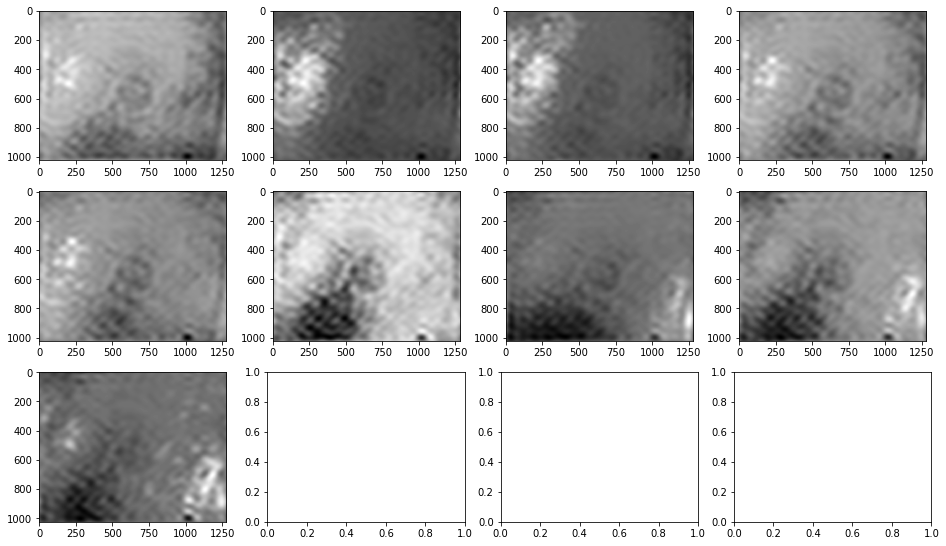

In [230]:
plot_images(rec)